In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
df1=pd.read_csv("employee.csv")

In [3]:
df1

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
name                 9 non-null object
age                  7 non-null float64
income               7 non-null float64
gender               7 non-null object
department           9 non-null object
grade                9 non-null object
performance_score    9 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 584.0+ bytes


In [5]:
df1.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [6]:
df1.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


# 2. Reset the index as "name" as the index.

In [7]:
df1.set_index(['name'], inplace = True)
df1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for speciﬁc names Jack Morgan and Josh wills.

In [8]:
df1.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [9]:
df1[(df1['department']=='Sales') | (df1['department']=='Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score

In [10]:
df1[df1['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [11]:
df1[(df1['performance_score']>500) & (df1['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

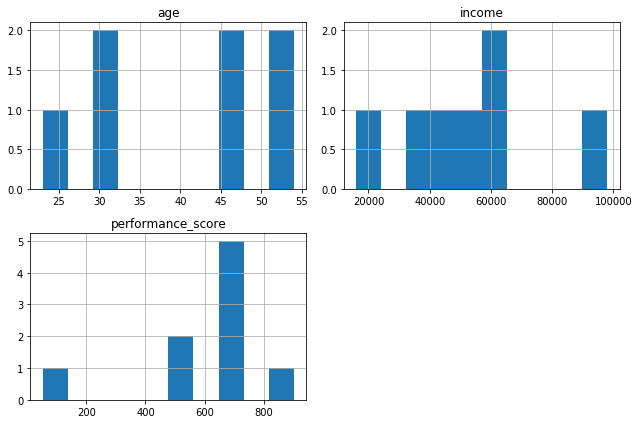

In [12]:
freqgraph=df1.select_dtypes(include=['float','int64'])
freqgraph.hist(figsize=(9,6))
plt.tight_layout()
plt.show()

In [13]:
## Filling missing values of gender with most commonly occuring value.
df1['gender']=df1['gender'].fillna(df1['gender'].value_counts().index[0])

In [14]:
## filing the missing values of age with its median
df1['age']=df1['age'].fillna(df1['age'].median())

In [15]:
## filing the missing values of income with its median
df1['income']=df1['income'].fillna(df1['income'].median())

In [16]:
df1.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [17]:
df1.describe()

,age,income,performance_score
count,9.000000,9.000000,9.000000
mean,41.444444,52666.666667,610.666667
std,10.760008,22544.400635,235.671912
min,23.000000,16000.000000,53.000000
25%,32.000000,42000.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,45.000000,62000.000000,711.000000
max,54.000000,98000.000000,901.000000


# 8. Check the outliers and handle outliers in performance score using Percentiles.

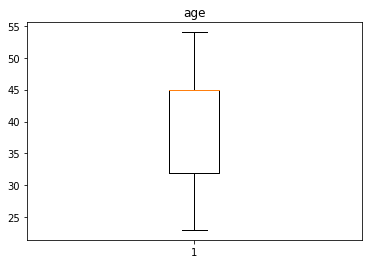

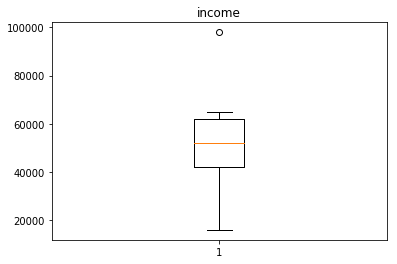

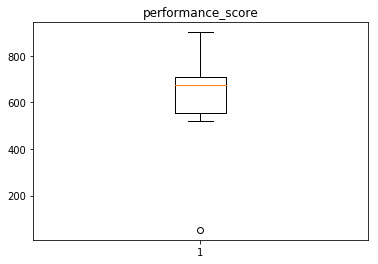

In [18]:
## checking outliers
for i in ['age','income', 'performance_score']:
    plt.title(i)
    plt.boxplot(df1[i])
    plt.show()  

#### Outliers in performance_score and income

In [19]:
## handling outliers in performance_score
q1=np.percentile(df1['performance_score'],25,interpolation='midpoint')
q3=np.percentile(df1['performance_score'],75,interpolation='midpoint')

In [20]:
IQR=q3-q1
low_limit=q1-IQR*1.5
high_limit=q3+IQR*1.5

In [21]:
## finding the index of those outliers
index=df1['performance_score'][(df1['performance_score']<low_limit) | (df1['performance_score']>high_limit)].index
index

Index(['James Authur'], dtype='object', name='name')

In [22]:
## dropping that index
df1.drop(index,inplace=True)

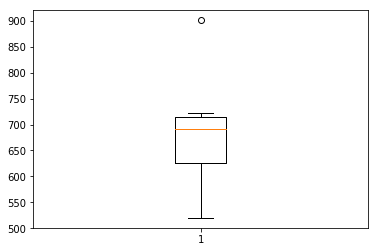

In [23]:
plt.boxplot(df1['performance_score'])
plt.show() 

# 9. Check the gender column and do Dummy encoding.

In [24]:
## one hot encoding
df1 = pd.get_dummies(df1, columns=['gender'])

In [25]:
df1

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


# 10.Do the standard scaling on the feature performance score.

In [26]:
from sklearn import preprocessing
stdn=preprocessing.StandardScaler()
x=df1['performance_score']
x = x.values.reshape(-1, 1)
x=stdn.fit_transform(x)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
x

array([[ 0.39226224],
       [-1.47587231],
       [-0.05866679],
       [-1.14457751],
       [ 0.28183064],
       [-0.28873262],
       [ 2.03033096],
       [ 0.26342538]])